# Bond pricing using the Vasicek model

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4,3]
mpl.rcParams['lines.linewidth'] = 2

import sys
sys.path.append('..')
from pyQuafi.models import bondPricing

## Introduction

A bond is a fixed-income investment wherein the issuer commits to pay the holder the mentioned _par value_ $P$ after a fixed period of time (at _maturity_ $T$). In addition, the issuer may pay the holder interest (_coupon_) at prescheduled intervals (typically semiannually). The price of the bond varies inversely with market interest rate $r$, so it is important to understand how interest rates evolve to price a bond.  

We will model the evolution of interest rates through the mean-reverting Vasicek model according to which the evolution of the interest rate is described by
\begin{equation*}
dr = -\kappa(r-\Theta)dt + \sigma dW
\end{equation*}
where $\kappa$ is the rate at which the interest rate relaxes towards the mean $\Theta$, $\sigma$ is the volatility of the interest rate and $W$ is a Wiener process. We integrate this stochastic different equation to obtain the interest rate at maturity $r(T)$ as an ensemble average over several Monte Carlo runs. With this, we will evaluate the bond price to be the discounted par value $P_b$, _i.e._,  
\begin{equation*}
P_b = K\exp\left\{-\int_0^T r(t)dt\right\}.
\end{equation*}
We will only consider zero coupon bonds, _i.e._, bonds which pay no coupons.  

__Parameters for simulation__  


Symbol |Meaning
-----|:-----
$\texttt{r0}$| risk-free interest rate at time $t=0$
$\texttt{T}$| time to maturity  
$\texttt{K}$| par value
$\texttt{kappa}$| relaxation rate  
$\texttt{theta}$| mean interest rate  
$\texttt{sigma}$| interest rate volatility  
$\texttt{dt}$| integration time step  
$\texttt{nRuns}$| number of independent runs

## Bond price as function of volatility

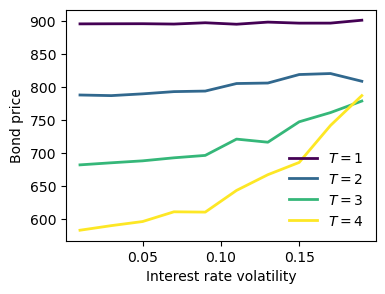

In [34]:
# Parameters
sigmas = np.arange(0.01,0.2,0.02) # list of volatilities
Ts = np.arange(1,5,1)
r0 = 0.1 
T = 2
parValue = 1000
K = 1000
kappa = 0.1
theta = 0.3
dt = 0.001
nRuns = 1000

clrs = plt.cm.viridis(np.linspace(0,1,len(Ts)))
for j,T in enumerate(Ts):
    price_bond = np.zeros(len(sigmas))
    for i,sigma in enumerate(sigmas):
        bond = bondPricing.Bond(r0, T, parValue, kappa, theta, sigma, dt, nRuns)
        price_bond[i] = bond.vasicek()
    plt.plot(sigmas,price_bond,c=clrs[j],label=rf'$T={T}$')

plt.xlabel('Interest rate volatility')
plt.ylabel('Bond price')
plt.legend(frameon=0)